Convd layer 줄임

In [1]:
#에러 코드 핸들링

import os

import warnings

 

import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt
 

#디렉토리 -> numpy 변환

import cv2



# 이미지 -> 디렉토리 및 라벨링

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical

 

#모델링

from keras.models import Sequential,load_model

from tensorflow.keras.layers import  Input, Conv2D, MaxPooling2D, Dense, Flatten, experimental, Dropout

 

# from tensorflow.keras.callbacks import ModelCheckpoint

 

 

import pandas as pd 

 

 

 
import datetime
 

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

warnings.filterwarnings(action='ignore')
 


In [62]:
# 데이터 증폭

train_data_augmentation = ImageDataGenerator(

    validation_split = 0.2,

    rotation_range=10,

    zoom_range = 0.3,

    width_shift_range=0.2,

    height_shift_range=0.2)

 

#train 데이터 설정 

train_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=150,

        #color_mode ='rgb',

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical')

 

 

# validation 데이터 설정

validation_data = train_data_augmentation.flow_from_directory(

        './images2/train',

        target_size = (300,300),

        batch_size=100,

        classes = ['food','interior', 'exterior'],

        shuffle =True,

        class_mode='categorical',

        subset='validation')

 

 

 

 

 

#test 데이터 설정

test_data = ImageDataGenerator().flow_from_directory(

        './images3/test',

        classes = ['food','interior', 'exterior'],

        target_size=(300,300),

        batch_size=25,

        class_mode='categorical')


Found 38752 images belonging to 3 classes.
Found 7749 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [3]:


model = Sequential([

Input(shape=(300,300,3), name='input_layer'),

# experimental.preprocessing.Resizing(

# height=1./255, width=1./255, interpolation="nearest", name='resizing_Layer'),

# BatchNormalization(), 

experimental.preprocessing.Rescaling(1./255),

Conv2D(32,(3,3), activation='relu',name='Conv_layer1'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer2'),
    

Conv2D(32,(3,3), activation='relu',name='Conv_layer3'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer4'),

 

Conv2D(32,(3,3), activation='relu',name='Conv_layer5'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer6'),
    

Dropout(0.5),

Conv2D(16,(3,3), activation='relu',name='Conv_layer7'),

MaxPooling2D(pool_size=(2,2),name='Pooling_layer8'),

Flatten(),

Dense(128, activation='relu',name='FC_layer9', kernel_initializer='glorot_uniform',),

Dense(32, activation='relu',name='FC_layer10', kernel_initializer='glorot_uniform',),

Dense(3, activation='softmax', name='output_layer11')

])

 

 

# 3. 모델 학습과정 설정 및 요약

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])






Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 300, 300, 3)       0         
_________________________________________________________________
Conv_layer1 (Conv2D)         (None, 298, 298, 32)      896       
_________________________________________________________________
Pooling_layer2 (MaxPooling2D (None, 149, 149, 32)      0         
_________________________________________________________________
Conv_layer3 (Conv2D)         (None, 147, 147, 32)      9248      
_________________________________________________________________
Pooling_layer4 (MaxPooling2D (None, 73, 73, 32)        0         
_________________________________________________________________
Conv_layer5 (Conv2D)         (None, 71, 71, 32)        9248      
_________________________________________________________________
Pooling_layer6 (MaxPooling2D (None, 35, 35, 32)        0

In [ ]:
a = datetime.datetime.now()
print('fitting start', a)

# 4. 모델 학습

history = model.fit(

    train_data,

    steps_per_epoch=10,

    epochs=20,

    validation_data=validation_data,

    validation_steps=10)

model.save('Model_Go_X3')

b = datetime.datetime.now()
print('Fitting End', b)
print('Fitting Time =' , b-a)

In [7]:


def plot_loss_curve(history):

    plt.figure(figsize = (5,3))

    plt.plot(history['loss'])

    plt.plot(history['val_loss'])


    plt.title('model loss')

    plt.xlabel('epoch')

    plt.ylabel('loss')

    plt.legend(['train','test'], loc = 'upper right')

    plt.show


In [8]:

model = load_model('Model_Go_X3')
# 5. 모델 평가하기

print("-- Evaluate --")

scores = model.evaluate_generator(test_data, steps=5)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

 

# 6. 모델 사용하기

print("-- Predict --")

output = model.predict_generator(test_data, steps=5)

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

print(test_data.class_indices)

print(output)

 

 

-- Evaluate --
accuracy: 73.60%
-- Predict --
{'food': 0, 'interior': 1, 'exterior': 2}
[[0.294 0.265 0.441]
 [0.165 0.403 0.432]
 [0.231 0.517 0.252]
 [0.345 0.306 0.349]
 [0.124 0.354 0.522]
 [0.482 0.374 0.144]
 [0.285 0.372 0.343]
 [0.107 0.268 0.625]
 [0.097 0.263 0.639]
 [0.061 0.201 0.738]
 [0.241 0.335 0.424]
 [0.697 0.256 0.047]
 [0.072 0.320 0.609]
 [0.111 0.225 0.664]
 [0.562 0.349 0.089]
 [0.443 0.340 0.217]
 [0.255 0.496 0.248]
 [0.217 0.495 0.288]
 [0.139 0.287 0.574]
 [0.482 0.299 0.219]
 [0.138 0.366 0.495]
 [0.067 0.283 0.651]
 [0.045 0.148 0.807]
 [0.106 0.245 0.649]
 [0.553 0.344 0.104]
 [0.111 0.375 0.515]
 [0.193 0.472 0.335]
 [0.445 0.283 0.272]
 [0.271 0.338 0.391]
 [0.438 0.356 0.205]
 [0.216 0.281 0.503]
 [0.011 0.118 0.871]
 [0.307 0.480 0.213]
 [0.091 0.259 0.650]
 [0.377 0.341 0.283]
 [0.315 0.475 0.211]
 [0.407 0.416 0.178]
 [0.216 0.453 0.331]
 [0.152 0.381 0.467]
 [0.218 0.518 0.264]
 [0.398 0.360 0.242]
 [0.182 0.308 0.510]
 [0.108 0.472 0.420]
 [0.330 0

{'loss': [1.1159913539886475, 1.0176366567611694, 0.9486656785011292, 0.9445524215698242, 0.8971875905990601, 0.9083024263381958, 0.851512610912323, 0.8306334018707275, 0.8299335241317749, 0.8019313216209412, 0.8248387575149536, 0.8254757523536682, 0.8122634291648865, 0.8198455572128296, 0.8193570971488953, 0.7947354912757874, 0.8061479330062866, 0.7983806133270264, 0.8016932606697083, 0.7721917033195496], 'accuracy': [0.49266666173934937, 0.4493333399295807, 0.4580000042915344, 0.48133334517478943, 0.5453333258628845, 0.562666654586792, 0.5986666679382324, 0.6293333172798157, 0.6126961708068848, 0.6359999775886536, 0.6146666407585144, 0.6359999775886536, 0.6176890134811401, 0.6159999966621399, 0.6119999885559082, 0.6313333511352539, 0.6299999952316284, 0.6393333077430725, 0.6320000290870667, 0.6460000276565552], 'val_loss': [1.0530312061309814, 1.0246241092681885, 0.974038302898407, 0.9534943103790283, 0.9628429412841797, 0.9196922779083252, 0.9095823764801025, 0.8549990057945251, 0.8

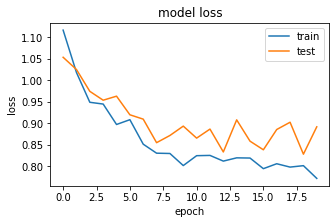

In [9]:


plot_loss_curve(history.history)

print(history.history)


print('train loss =', history.history['loss'][-1])

print('validation loss =', history.history['val_loss'][-1])

 
    

 


In [57]:


# 영광스러운 디렉토리 -> 넘파이 어레이 변환..! 

 
x=np.concatenate([test_data.next()[0] for i in range(test_data.__len__())])

y=np.concatenate([test_data.next()[1] for i in range(test_data.__len__())])

print(x.shape)

print(y.shape)


(30, 300, 300, 3)
(30, 3)


In [63]:

def predict_image_sample(model,X_test, y_test, test_id= -1 ):

    if test_id <0 :

        from random import randrange
        test_sample_id = randrange(31)

    else:
        test_sample_id = test_id

    test_image =X_test[test_sample_id]

 

 

    #이미지로 만들기!! 

#     image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

    pixels = np.array(test_image,np.int32)

    plt.imshow(pixels)

    plt.show()

    print(test_sample_id)
    test_image = test_image.reshape(1,300,300,3)

    print(test_data.class_indices)

    y_actual = y_test[test_sample_id]
    
    print( y_actual)

    print('y_actual number = ', np.argmax(y_actual))

    

    y_pred = model.predict(test_image)

    print("y_pred = ", y_pred)

    y_pred = np.argmax(y_pred, axis = 1)[0]

    print('y_pred number = ', y_pred)

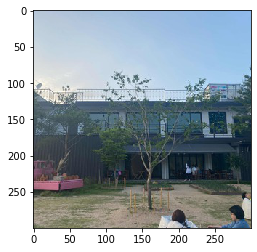

13
{'food': 0, 'interior': 1, 'exterior': 2}
[1.000 0.000 0.000]
y_actual number =  0
y_pred =  [[0.080 0.278 0.643]]
y_pred number =  2


In [76]:
if __name__ == '__main__' :
    model = load_model('Model_Go_X3')
    X_test , y_test = x,y
    predict_image_sample(model,X_test, y_test)